In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [103]:
df = pd.read_csv('/Users/admin/Desktop/Data Analyst - Scientist Career/Datasets/Real_Estate_Sales_2001-2020_GL.csv')
df.head(3)

/var/folders/wx/7dmr67zx5b3cbyb9xt2zx31w0000gn/T/ipykernel_1141/3227307515.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/admin/Desktop/Data Analyst - Scientist Career/Datasets/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Unnamed: 14,Unnamed: 15
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),NaN,NaN
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997213 entries, 0 to 997212
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
 14  Unnamed: 14       0 non-null       float64
 15  Unnamed: 15       0 non-null       float64
dtypes: float64(4), int64

# DATA CLEANING 

1. Convert column 'serial number' to type Object
2. Covert column 'List year' to type datetime
3. Covert column 'Date recorded' to type datetime
4. The 'OPM remarks' column has too few data to be of relevance to the dataset hence will be dropped.
5. 'Unnamed 14' & '15 column' will be dropped as they do not contribute any significant data to the dataset.

In [105]:
# 1
df["Serial Number"].astype("object")
# 2
df["List Year"] = pd.to_datetime(df["List Year"])
# 3
df["Date Recorded"] = pd.to_datetime(df["Date Recorded"])
# 4 & 5
df = df.drop(["OPM remarks", "Unnamed: 14", "Unnamed: 15", "Location", "Assessor Remarks", "Non Use Code"], axis=1)
df.head(3)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,1970-01-01 00:00:00.000002020,2021-04-14,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family
1,2020225,1970-01-01 00:00:00.000002020,2021-05-26,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family
2,2020348,1970-01-01 00:00:00.000002020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN


# EXPLORATORY DATA ANALYSIS

1. Check how many missing values are in each field

In [106]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
dtype: int64

## DATA TRANSFORMATION

1. The average sales amount of the property is analyzed for each property type
2. Missing data in property type are estimated based on the sales amount.
3. Commercial property types are not residential hence will be kept as nan in the 'residential type' column

In [107]:
df["years_on_list"]=df["Date Recorded"].dt.year - df["List Year"].dt.year

In [108]:
df2 = df[~(df['Sale Amount'] == 0)]
df2.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,years_on_list
0,2020177,1970-01-01 00:00:00.000002020,2021-04-14,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family,51.0
1,2020225,1970-01-01 00:00:00.000002020,2021-05-26,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family,51.0
2,2020348,1970-01-01 00:00:00.000002020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,51.0
3,2020090,1970-01-01 00:00:00.000002020,2020-12-14,Ansonia,57 PLATT ST,127400,202500.0,0.6291,Residential,Two Family,50.0
4,200500,1970-01-01 00:00:00.000002020,2021-09-07,Avon,245 NEW ROAD,217640,400000.0,0.5441,Residential,Single Family,51.0


In [109]:
df2["years_on_list"].unique()

array([51., 50., 32., 31., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 29.])

In [88]:
#Apartment Property types are also a Residential Type

condition = df2['Property Type'] == 'Apartments'
df2.loc[condition, 'Residential Type'] = df2.loc[condition, 'Residential Type'].replace("", np.NaN).fillna(df2.loc[condition, 'Property Type'])
df2['Residential Type'].unique()

array(['Single Family', 'Three Family', nan, 'Two Family', 'Condo',
       'Apartments', 'Four Family'], dtype=object)

## TREATING Null(na) VALUES

In [110]:
df3 = pd.DataFrame({"years_on_list":[ ],'sales_ratio': [], "sale_amount": [ ], "property_type": [ ]})
df3["years_on_list"] = df2["years_on_list"]
df3["sale_amount"] = df2 ["Sale Amount"]
df3["property_type"]= df2["Property Type"]
df3["sales_ratio"]=df2["Sales Ratio"]
df3 = df3.sort_values('sale_amount', ascending=False).reset_index()
df3.head(3)


,index,years_on_list,sales_ratio,sale_amount,property_type
0,59764,51.0,0.000448,5.000000e+09,Apartments
1,801959,46.0,0.027381,3.955000e+08,NaN
2,839100,46.0,0.233749,3.955000e+08,NaN


### ASSUMPTION:

1. To treat the null values in the property type column, the sale amount for the property types are arranged in descending order
2. Pandas dataframe ffill() method is then called to fill the null values with the property type from the previous row.
3. This method assumes the sale amount that are in the same range of prices are likely to be for the same property types.
4. Hence the null values are filled with property types of similar sale amount.

In [111]:
df3["property_type_updated"] = df3["property_type"].fillna(method='ffill')
df3= df3.drop(['property_type', 'index'], axis=1)
df3.isna().sum()

years_on_list            0
sales_ratio              0
sale_amount              0
property_type_updated    0
dtype: int64

### REMOVING OUTLIERS FROM THE DATA (USING INTER QUARTILE RANGE METHOD)

In [112]:
Q1 = df3.sales_ratio.quantile(0.25)
Q3 = df3.sales_ratio.quantile(0.75)
Q1, Q3

(0.4875353355, 0.7858)

In [113]:
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(0.04013833874999989, 1.2331969967500003)

In [114]:
df_outliers = df3[(df3.sales_ratio<lower_limit)|(df3.sales_ratio>upper_limit)]
df_outliers

,years_on_list,sales_ratio,sale_amount,property_type_updated
0,51.0,0.000448,5.000000e+09,Apartments
1,46.0,0.027381,3.955000e+08,Apartments
4,46.0,0.027651,3.955000e+08,Apartments
6,46.0,0.008093,3.955000e+08,Apartments
7,46.0,0.008363,3.955000e+08,Apartments
...,...,...,...,...
995398,36.0,112120.000000,1.000000e+00,Single Family
995399,36.0,83280.000000,1.000000e+00,Single Family
995400,36.0,368680.000000,1.000000e+00,Single Family
995401,48.0,241910.000000,1.000000e+00,Single Family


In [115]:
df_no_outlier = df3[(df3.sales_ratio>lower_limit)&(df3.sales_ratio<upper_limit)]
df_no_outlier

,years_on_list,sales_ratio,sale_amount,property_type_updated
2,46.0,0.233749,395500000.0,Apartments
3,46.0,0.128496,395500000.0,Apartments
5,46.0,0.141958,395500000.0,Apartments
9,46.0,0.058889,395500000.0,Apartments
11,49.0,0.621000,230043624.0,Residential
...,...,...,...,...
995304,35.0,0.314136,573.0,Single Family
995306,33.0,1.000000,530.0,Single Family
995310,35.0,0.780000,500.0,Condo
995320,35.0,0.378378,370.0,Condo


<Axes: xlabel='sales_ratio', ylabel='sale_amount'>

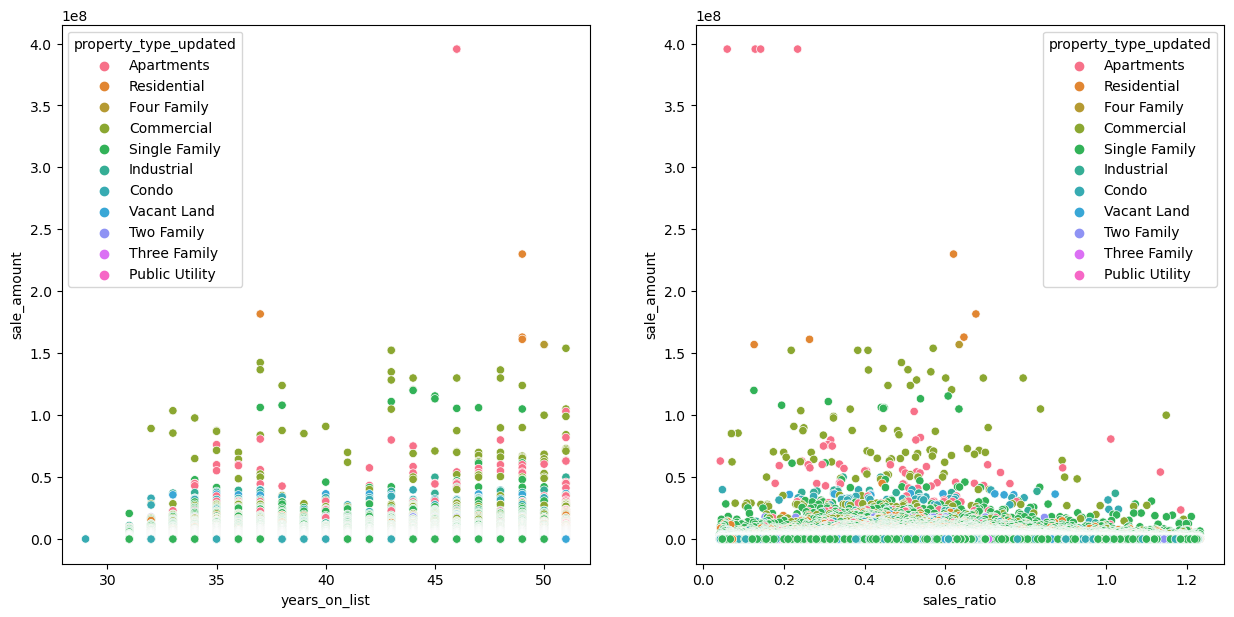

In [118]:
fig, ax=plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(data=df_no_outlier, x="years_on_list", y="sale_amount", hue='property_type_updated', ax=ax[0])
sns.scatterplot(data=df_no_outlier, x="sales_ratio", y="sale_amount", hue='property_type_updated', ax=ax[1])


## ANALYSIS PHASE COMPLETED

## NEXT PHASE: BUILDING A PREDICTIVE MODEL